In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parameters_for_line():
    return np.random.uniform(-10, 10, 3)

def return_points(number_of_points):
    return np.random.uniform(-200, 200, size=(number_of_points, 2))

def draw_hyper_plane(hyper_plane_parameters_2):
    x = np.array([ -100, 100, 70, 10, 20, 22, 16], float)
    y = ((-hyper_plane_parameters_2[1] * x) - hyper_plane_parameters_2[2]) / hyper_plane_parameters_2[0]
    
    return np.array([x, y])

def find_points_class(hyper_plane_parameters_1, all_training_points):
    
    class_array = np.zeros((all_training_points.shape[0], 2))
    all_training_points = np.hstack((all_training_points, np.ones((all_training_points.shape[0], 1), float)))
    
    for i in range(all_training_points.shape[0]):
        if(np.matmul(np.transpose(hyper_plane_parameters_1), all_training_points[i, :])[0] > 0):
            class_array[i, :] = [1.0, 0.0]
        else:
            class_array[i, :] = [0.0, 1.0]
    
    return class_array

In [3]:
hyper_plane_parameters = parameters_for_line().reshape((3,1))

print('------------\nPlane Parameters')
print(hyper_plane_parameters)


plane_points = draw_hyper_plane(hyper_plane_parameters)
print('------------\nPoints')
print(plane_points)




------------
Plane Parameters
[[-9.19506089]
 [ 0.4330411 ]
 [ 2.99168879]]
------------
Points
[[-100.          100.           70.           10.           20.           22.
    16.        ]
 [  -4.38413856    5.03485503    3.62200599    0.79630792    1.26725759
     1.36144753    1.07887772]]


In [4]:
all_training_points_1 = return_points(500)
class_array = find_points_class(hyper_plane_parameters, all_training_points_1)

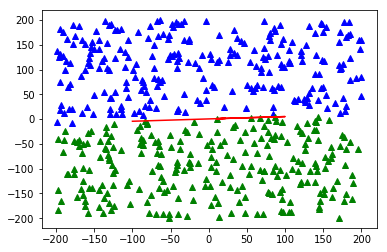

In [5]:
for i in range(class_array.shape[0]):
    if class_array[i, 0] > 0:
        plt.plot(all_training_points_1[i, 1], all_training_points_1[i, 0], 'g^')
    else:
        plt.plot(all_training_points_1[i, 1], all_training_points_1[i, 0], 'b^')

plt.plot(plane_points[0, :], plane_points[1, :], 'r')
plt.show()

In [10]:
batch_size = 24
learning_rate = 0.1


x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 2])

weights = tf.Variable(tf.random_normal([2,2], dtype=tf.float32))
biases = tf.Variable(tf.random_normal([1,2], dtype=tf.float32))

logits_1 = tf.add(tf.matmul(x, weights), biases)
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits_1, labels=y))

gradient_optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

are_they_same = tf.equal(tf.arg_max(logits_1, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(are_they_same, 'float'))


with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    i = 0
    while(((i*batch_size) + batch_size) <= all_training_points_1.shape[0]):
        print(str(i + 1) + " Iteration")
        session.run([gradient_optimizer, error], feed_dict={x:all_training_points_1[(i*batch_size):(i*batch_size) + batch_size, :], y:class_array[(i*batch_size):(i*batch_size) + batch_size, :]})
        print(session.run(weights))
        i+= 1
    
    print('\n\nAccuracy\n\n')
    
    print(session.run(accuracy, feed_dict={x:all_training_points_1, y:class_array}))






1 Iteration
[[-7.91434479  7.40951443]
 [ 7.03298903 -7.79124689]]
2 Iteration
[[-9.68954754  9.18471718]
 [ 2.97086239 -3.72912025]]
3 Iteration
[[-9.84428024  9.33944988]
 [ 2.08966255 -2.84792042]]
4 Iteration
[[-9.84428024  9.33944988]
 [ 2.08966255 -2.84792042]]
5 Iteration
[[-9.84428024  9.33944988]
 [ 2.08966255 -2.84792042]]
6 Iteration
[[-9.90624046  9.4014101 ]
 [ 1.71329474 -2.47155261]]
7 Iteration
[[-9.93993664  9.43510628]
 [ 1.37373042 -2.13198829]]
8 Iteration
[[-10.03256798   9.52773762]
 [  0.72674161  -1.48499942]]
9 Iteration
[[-10.03256798   9.52773762]
 [  0.72674161  -1.48499942]]
10 Iteration
[[-10.09815884   9.59332848]
 [ -0.01789242  -0.74036539]]
11 Iteration
[[-10.09815884   9.59332848]
 [ -0.01789242  -0.74036539]]
12 Iteration
[[-10.09815884   9.59332848]
 [ -0.01789242  -0.74036539]]
13 Iteration
[[-10.09815884   9.59332848]
 [ -0.01789242  -0.74036539]]
14 Iteration
[[-10.09815884   9.59332848]
 [ -0.01789242  -0.74036539]]
15 Iteration
[[-10.09815884  